# Tree-based Algorithms:
---
* Decision Tree
* Random Forest
* XGBoost

Import dependencies

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

Load Data

In [21]:
# Load the csv files
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Train the Models (Default parameters)

In [22]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print('------- Decision Tree (Default) Results -------')
print(classification_report(y_test, dt_pred))
print('Decision Tree: ', accuracy_score(y_test, dt_pred))

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print('------- Random Forest (Default) Results -------')
print(classification_report(y_test, rf_pred))
print('Random Forest Accuracy: ', accuracy_score(y_test, rf_pred))

# XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
print('------- XGBoost (Default) Results -------')
print(classification_report(y_test, xgb_pred))
print('XGBoost Accuracy: ',accuracy_score(y_test, xgb_pred))

------- Decision Tree (Default) Results -------
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     44147
           1       0.52      0.57      0.54      6253

    accuracy                           0.88     50400
   macro avg       0.73      0.75      0.74     50400
weighted avg       0.89      0.88      0.88     50400

Decision Tree:  0.8804960317460317


C:\Users\skuma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


------- Random Forest (Default) Results -------
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     44147
           1       0.60      0.54      0.57      6253

    accuracy                           0.90     50400
   macro avg       0.77      0.74      0.76     50400
weighted avg       0.89      0.90      0.90     50400

Random Forest Accuracy:  0.8991071428571429
------- XGBoost (Default) Results -------
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     44147
           1       0.64      0.25      0.35      6253

    accuracy                           0.89     50400
   macro avg       0.77      0.61      0.65     50400
weighted avg       0.87      0.89      0.87     50400

XGBoost Accuracy:  0.8889880952380952


### Trying SMOTE due to Imbalanced dataset.

In [23]:
sm = SMOTE(random_state=0)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# Train
dt.fit(X_resampled, y_resampled)
rf.fit(X_resampled, y_resampled)
xgb.fit(X_resampled, y_resampled)

# Predict
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)

# Print results
print('------- Decision Tree (SMOTE) Results -------')
print(classification_report(y_test, dt_pred))
print('-------Random Forest (SMOTE) Results -------')
print(classification_report(y_test, rf_pred))
print('-------XGBoost (SMOTE) Results -------')
print(classification_report(y_test, xgb_pred))

C:\Users\skuma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


------- Decision Tree (SMOTE) Results -------
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     44147
           1       0.49      0.83      0.61      6253

    accuracy                           0.87     50400
   macro avg       0.73      0.85      0.77     50400
weighted avg       0.91      0.87      0.88     50400

-------Random Forest (SMOTE) Results -------
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     44147
           1       0.55      0.77      0.64      6253

    accuracy                           0.89     50400
   macro avg       0.76      0.84      0.79     50400
weighted avg       0.91      0.89      0.90     50400

-------XGBoost (SMOTE) Results -------
              precision    recall  f1-score   support

           0       0.96      0.88      0.92     44147
           1       0.48      0.75      0.58      6253

    accuracy                           0.87     5040

After using SMOTE, the recall scores for the minority class improved in all 3 models:
* Decision Tree: 0.57 -> 0.83
* Random Forest: 0.54 -> 0.77
* XGBoost: 0.25 -> 0.75

While there were slight decreases in accuracy and precision, recall was more important because the goal was to identify all positive instances.

### Hyperparameter Tuning

#### First, find the best hyperparameters for each model.

Decision Tree

In [14]:
treeParams = {
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini","entropy"]
}
gs = GridSearchCV(DecisionTreeClassifier(), treeParams, cv=5)
gs.fit(X_train, y_train)
print(gs.best_params_)

{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}


Random Forest

In [16]:
randomForestParams = {
    "max_depth": [None, 10, 20],
    "max_features": ["sqrt","log2"],
    "min_samples_leaf": [1,2,4]
}
rs = RandomizedSearchCV(RandomForestClassifier(), randomForestParams, n_iter=20, cv=3)
rs.fit(X_train, y_train)
print(rs.best_params_)

C:\Users\skuma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 18 is smaller than n_iter=20. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\skuma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\skuma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example 

{'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}


XGBoost

In [18]:
#model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgbParams = {
    "max_depth": [3,6,9],
    "learning_rate": [0.01,0.1,0.2],
    "subsample": [0.6,0.8,1.0],
    "colsample_bytree": [0.6,0.8,1.0],
    "gamma": [0,1,5]
}
gs = GridSearchCV(XGBClassifier(), xgbParams, cv=3)
gs.fit(X_train, y_train)
print(gs.best_params_)

C:\Users\skuma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'colsample_bytree': 1.0, 'gamma': 1, 'learning_rate': 0.2, 'max_depth': 9, 'subsample': 0.6}


#### Train the models with SMOTE and best hyperparameters.

In [19]:
# Initialize models with the best hyperparametrs
dtBest = DecisionTreeClassifier(max_depth=20, min_samples_split=10, min_samples_leaf=4, criterion='gini')
rfBest = RandomForestClassifier(max_depth=None, max_features='log2', min_samples_leaf=1)
xgbBest = XGBClassifier(max_depth=9, learning_rate=0.2, subsample=0.6, colsample_bytree=1.0, gamma=1)

# Train
dtBest.fit(X_resampled, y_resampled)
rfBest.fit(X_resampled, y_resampled)
xgbBest.fit(X_resampled, y_resampled)

# Predict
dtBest_pred = dt.predict(X_test)
rfBest_pred = rf.predict(X_test)
xgbBest_pred = xgb.predict(X_test)

# Print results
print('------- Decision Tree (Best) Results -------')
print(classification_report(y_test, dtBest_pred))
print('-------Random Forest (Best) Results -------')
print(classification_report(y_test, rfBest_pred))
print('-------XGBoost (Best) Results -------')
print(classification_report(y_test, xgbBest_pred))

C:\Users\skuma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


------- Decision Tree (Best) Results -------
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     44147
           1       0.48      0.83      0.61      6253

    accuracy                           0.87     50400
   macro avg       0.73      0.85      0.77     50400
weighted avg       0.91      0.87      0.88     50400

-------Random Forest (Best) Results -------
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     44147
           1       0.55      0.77      0.64      6253

    accuracy                           0.89     50400
   macro avg       0.76      0.84      0.79     50400
weighted avg       0.91      0.89      0.90     50400

-------XGBoost (Best) Results -------
              precision    recall  f1-score   support

           0       0.96      0.88      0.92     44147
           1       0.48      0.75      0.58      6253

    accuracy                           0.87     50400
 

### Plots

In [26]:
models = {'Decision Tree': dtBest, 'Random Forest': rfBest, 'XGBoost': xgbBest}

ROC-AUC Curve

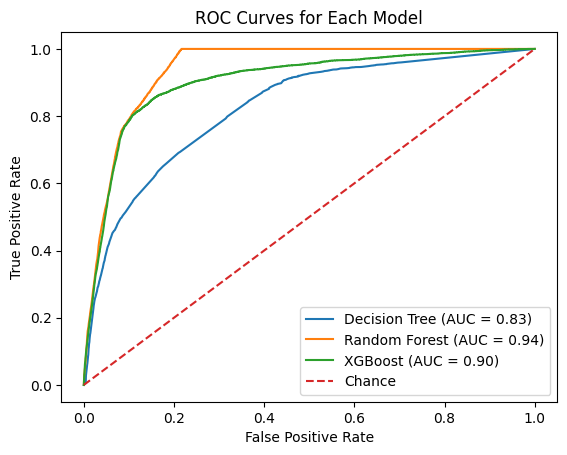

In [27]:
plt.figure()
for name, model in models.items():
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], '--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Model')
plt.legend(loc='lower right')
plt.show()

Precision-Recall Curve

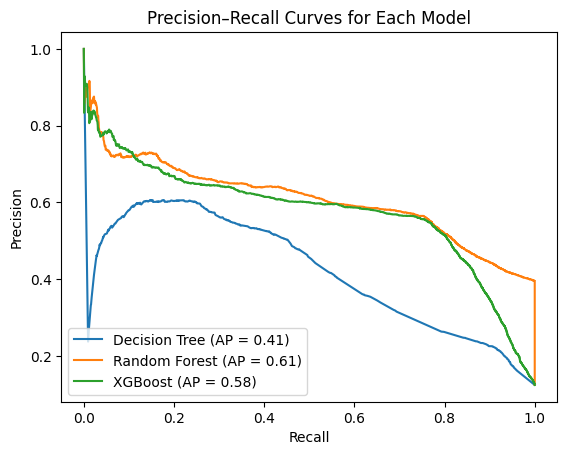

In [30]:
plt.figure()
for name, model in models.items():
    y_score = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    ap = average_precision_score(y_test, y_score)
    plt.plot(recall, precision, label=f'{name} (AP = {ap:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curves for Each Model')
plt.legend(loc='lower left')
plt.show()

Confusion Matrices

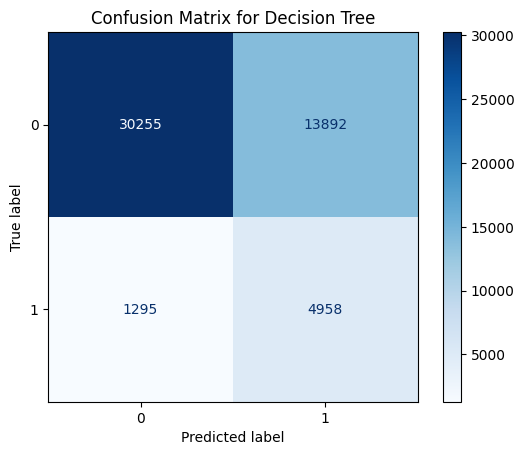

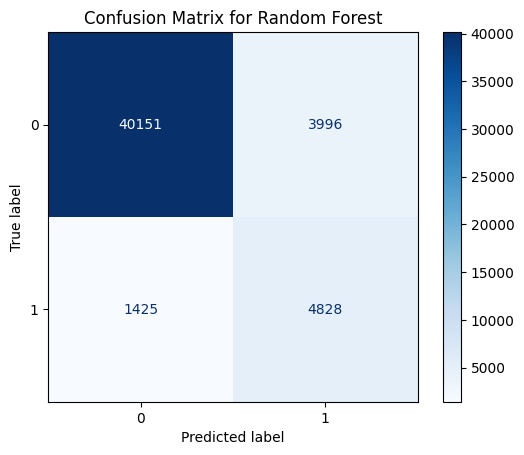

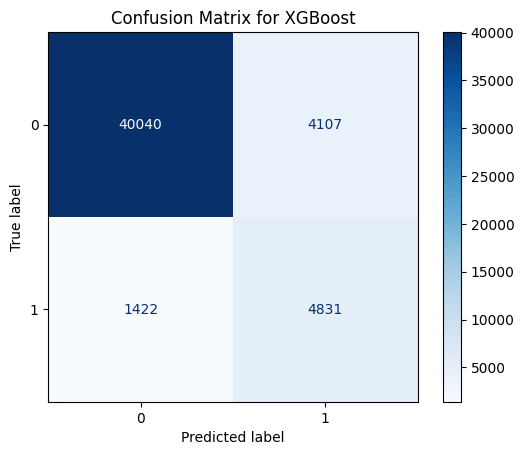

In [32]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()